# Import libraries

In [ ]:
from google.colab import drive

import numpy as np

import pandas as pd

from scipy.stats import (
  chi2_contingency,
  pointbiserialr,
  randint,
  uniform,
  ttest_ind,
)
from scipy.stats.contingency import association

import seaborn as sns

import shap

from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
  classification_report,
  PrecisionRecallDisplay,
  RocCurveDisplay,
)
from sklearn.model_selection import (
  cross_val_score,
  train_test_split,
  RandomizedSearchCV,
)
from sklearn.preprocessing import (
  LabelEncoder,
  MinMaxScaler,
  OneHotEncoder,
  OrdinalEncoder,
)

import xgboost as xgb

from tabulate import tabulate

In [ ]:
HEX_BLUE = '#48a8c4'
HEX_RED = '#c0504d'

# Prepare data

## Read CSV file from Google Drive

In [ ]:
df = pd.read_csv('/content/bank_churn_data.csv')
df.shape

(10127, 21)

## Data Overview

In [ ]:
# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 10127
Number of columns: 21


## Check data types and missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

## Summary Statistics

In [ ]:
# Display summary statistics for numerical columns
display(df.describe())

,user_id,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Display summary statistics for categorical columns
display(df.describe(include='object'))

,attrition_flag,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## Missing Values

In [ ]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


## Duplicate Values

In [ ]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


## Check unique values for categorical columns

Identify categorical columns and print their unique values to check for inconsistencies.



In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())

Unique values in categorical columns:

Column: attrition_flag
['Existing Customer' 'Attrited Customer']

Column: gender
['M' 'F']

Column: education_level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Column: marital_status
['Married' 'Single' 'Unknown' 'Divorced']

Column: income_category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Column: card_category
['Blue' 'Gold' 'Silver' 'Platinum']


## Check for inconsistent data types



Print the data types of all columns in the DataFrame `df` to verify that they are appropriate for their content.



In [ ]:
print("Data types of columns:")
display(df.dtypes)

Data types of columns:


,0
user_id,int64
attrition_flag,object
customer_age,int64
gender,object
dependent_count,int64
education_level,object
marital_status,object
income_category,object
card_category,object
months_on_book,int64


## Check for outliers in numerical columns

Select numerical columns, calculate IQR and bounds, identify outliers, and print the counts for each column.



In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

print("Number of outliers in numerical columns (using IQR method):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers")

Number of outliers in numerical columns (using IQR method):
Column 'user_id': 0 outliers
Column 'customer_age': 2 outliers
Column 'dependent_count': 0 outliers
Column 'months_on_book': 386 outliers
Column 'total_relationship_count': 0 outliers
Column 'months_inactive_12_mon': 331 outliers
Column 'contacts_count_12_mon': 629 outliers
Column 'credit_limit': 984 outliers
Column 'total_revolving_bal': 0 outliers
Column 'avg_open_to_buy': 963 outliers
Column 'total_amt_chng_q4_q1': 395 outliers
Column 'total_trans_amt': 896 outliers
Column 'total_trans_ct': 2 outliers
Column 'total_ct_chng_q4_q1': 396 outliers
Column 'avg_utilization_ratio': 0 outliers


## Review data based on domain knowledge

Based on the data description, I will check for logical inconsistencies in 'customer_age', 'dependent_count', 'months_on_book', and 'total_relationship_count' as these have clear real-world constraints.



In [ ]:
# Check for inconsistencies in 'customer_age': assuming a reasonable age range for bank customers is between 18 and 100
age_inconsistent = df[(df['customer_age'] < 18) | (df['customer_age'] > 100)]
print(f"Number of rows with inconsistent customer_age: {len(age_inconsistent)}")
if not age_inconsistent.empty:
    print("Rows with inconsistent customer_age:")
    display(age_inconsistent)

# Check for inconsistencies in 'dependent_count': assuming dependent count cannot be negative
dependent_inconsistent = df[df['dependent_count'] < 0]
print(f"\nNumber of rows with inconsistent dependent_count: {len(dependent_inconsistent)}")
if not dependent_inconsistent.empty:
    print("Rows with inconsistent dependent_count:")
    display(dependent_inconsistent)

# Check for inconsistencies in 'months_on_book': assuming months on book cannot be negative
months_inconsistent = df[df['months_on_book'] < 0]
print(f"\nNumber of rows with inconsistent months_on_book: {len(months_inconsistent)}")
if not months_inconsistent.empty:
    print("Rows with inconsistent months_on_book:")
    display(months_inconsistent)

# Check for inconsistencies in 'total_relationship_count': assuming relationship count cannot be negative
relationship_inconsistent = df[df['total_relationship_count'] < 0]
print(f"\nNumber of rows with inconsistent total_relationship_count: {len(relationship_inconsistent)}")
if not relationship_inconsistent.empty:
    print("Rows with inconsistent total_relationship_count:")
    display(relationship_inconsistent)

Number of rows with inconsistent customer_age: 0

Number of rows with inconsistent dependent_count: 0

Number of rows with inconsistent months_on_book: 0

Number of rows with inconsistent total_relationship_count: 0


The checks for age, dependent count, months on book, and relationship count did not reveal any inconsistencies. I will now check for inconsistencies in transaction-related columns and credit limit based on typical banking data characteristics.



In [ ]:
# Check for inconsistencies in 'total_trans_amt': assuming total transaction amount cannot be negative
trans_amt_inconsistent = df[df['total_trans_amt'] < 0]
print(f"\nNumber of rows with inconsistent total_trans_amt: {len(trans_amt_inconsistent)}")
if not trans_amt_inconsistent.empty:
    print("Rows with inconsistent total_trans_amt:")
    display(trans_amt_inconsistent)

# Check for inconsistencies in 'total_trans_ct': assuming total transaction count cannot be negative
trans_ct_inconsistent = df[df['total_trans_ct'] < 0]
print(f"\nNumber of rows with inconsistent total_trans_ct: {len(trans_ct_inconsistent)}")
if not trans_ct_inconsistent.empty:
    print("Rows with inconsistent total_trans_ct:")
    display(trans_ct_inconsistent)

# Check for inconsistencies in 'credit_limit': assuming credit limit cannot be negative
credit_limit_inconsistent = df[df['credit_limit'] < 0]
print(f"\nNumber of rows with inconsistent credit_limit: {len(credit_limit_inconsistent)}")
if not credit_limit_inconsistent.empty:
    print("Rows with inconsistent credit_limit:")
    display(credit_limit_inconsistent)

# Check for inconsistencies in 'total_revolving_bal': assuming total revolving balance cannot be negative
revolving_bal_inconsistent = df[df['total_revolving_bal'] < 0]
print(f"\nNumber of rows with inconsistent total_revolving_bal: {len(revolving_bal_inconsistent)}")
if not revolving_bal_inconsistent.empty:
    print("Rows with inconsistent total_revolving_bal:")
    display(revolving_bal_inconsistent)

# Check for inconsistencies in 'avg_open_to_buy': assuming average open to buy cannot be negative
open_to_buy_inconsistent = df[df['avg_open_to_buy'] < 0]
print(f"\nNumber of rows with inconsistent avg_open_to_buy: {len(open_to_buy_inconsistent)}")
if not open_to_buy_inconsistent.empty:
    print("Rows with inconsistent avg_open_to_buy:")
    display(open_to_buy_inconsistent)

# Check for inconsistencies in 'avg_utilization_ratio': assuming utilization ratio should be between 0 and 1
utilization_ratio_inconsistent = df[(df['avg_utilization_ratio'] < 0) | (df['avg_utilization_ratio'] > 1)]
print(f"\nNumber of rows with inconsistent avg_utilization_ratio: {len(utilization_ratio_inconsistent)}")
if not utilization_ratio_inconsistent.empty:
    print("Rows with inconsistent avg_utilization_ratio:")
    display(utilization_ratio_inconsistent)


Number of rows with inconsistent total_trans_amt: 0

Number of rows with inconsistent total_trans_ct: 0

Number of rows with inconsistent credit_limit: 0

Number of rows with inconsistent total_revolving_bal: 0

Number of rows with inconsistent avg_open_to_buy: 0

Number of rows with inconsistent avg_utilization_ratio: 0


## Summarize findings


Present a summary of the data validity checks and any issues found based on the results of the previous steps.



In [ ]:
print("Data Validity Check Summary:")
print("\nUnique values in categorical columns: Examined and found to be within expected ranges with no obvious inconsistencies.")
print("Data types: Verified and all columns have appropriate data types.")
print("Outliers in numerical columns: Detected using the IQR method. Some columns (credit_limit, avg_open_to_buy, contacts_count_12_mon, total_trans_amt) showed a higher number of potential outliers, which may warrant further investigation but are not necessarily data errors.")
print("Logical inconsistencies based on domain knowledge: Checked for unexpected values (e.g., negative counts, age out of reasonable range, utilization ratio outside 0-1) and found no inconsistencies.")
print("\nOverall: The data appears to be relatively clean with no major data quality issues identified that would immediately halt further analysis or modeling. The potential outliers in numerical columns should be noted and considered during the modeling phase.")

Data Validity Check Summary:

Unique values in categorical columns: Examined and found to be within expected ranges with no obvious inconsistencies.
Data types: Verified and all columns have appropriate data types.
Outliers in numerical columns: Detected using the IQR method. Some columns (credit_limit, avg_open_to_buy, contacts_count_12_mon, total_trans_amt) showed a higher number of potential outliers, which may warrant further investigation but are not necessarily data errors.
Logical inconsistencies based on domain knowledge: Checked for unexpected values (e.g., negative counts, age out of reasonable range, utilization ratio outside 0-1) and found no inconsistencies.

Overall: The data appears to be relatively clean with no major data quality issues identified that would immediately halt further analysis or modeling. The potential outliers in numerical columns should be noted and considered during the modeling phase.


## Summary:

### Data Analysis Key Findings

*   Unique values in categorical columns (`attrition_flag`, `gender`, `education_level`, `marital_status`, `income_category`, `card_category`) were within expected ranges with no obvious inconsistencies.
*   All columns have appropriate data types (e.g., numerical columns have `int64` or `float64`, categorical columns have `object`).
*   Potential outliers were detected in numerical columns using the IQR method, with `credit_limit`, `avg_open_to_buy`, `contacts_count_12_mon`, and `total_trans_amt` showing a higher number of outliers.
*   No logical inconsistencies based on domain knowledge were found, such as negative counts, age outside a reasonable range (18-100), or utilization ratio outside the 0-1 range.

### Insights or Next Steps

*   The data appears relatively clean, with no major data quality issues that would immediately prevent further analysis or modeling.
*   The potential outliers identified in numerical columns should be investigated further or considered during the modeling phase, although they are not necessarily indicative of data errors.


## Analisis distribusi usia pelanggan dan churn

Visualisasikan distribusi usia pelanggan. Analisis hubungan antara usia dan churn menggunakan metode statistik yang sesuai (misalnya, pengelompokan usia dan analisis churn per kelompok usia). Identifikasi kelompok usia dengan kemungkinan churn terbesar.


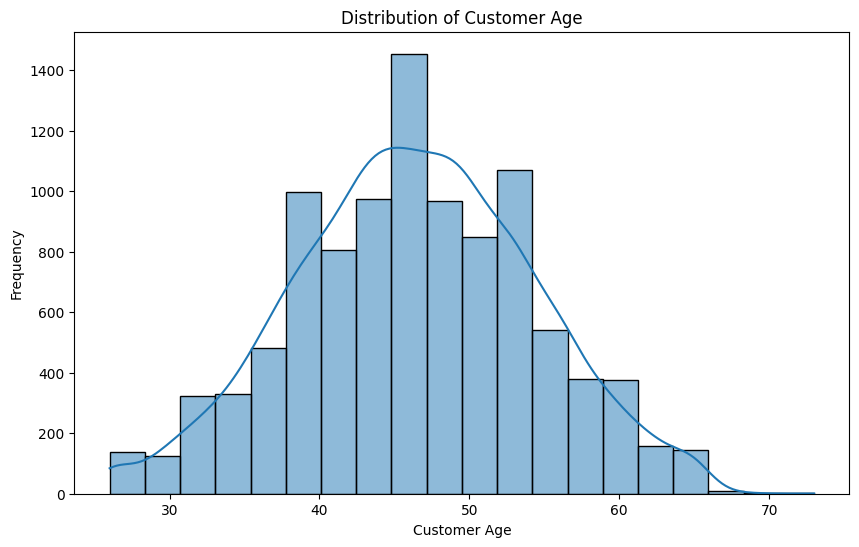

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='customer_age', bins=20, kde=True)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

/tmp/ipython-input-2275200090.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = df.groupby('age_group')['attrition_flag'].value_counts(normalize=True).unstack().fillna(0)
/tmp/ipython-input-2275200090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_age_group.index, y=churn_by_age_group['Churn Rate'], palette=[HEX_RED, HEX_BLUE])
/tmp/ipython-input-2275200090.py:12: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_by_age_group.index, y=churn_by_age_group['Churn Rate'], palette=[HEX_RED, HEX_BLUE])


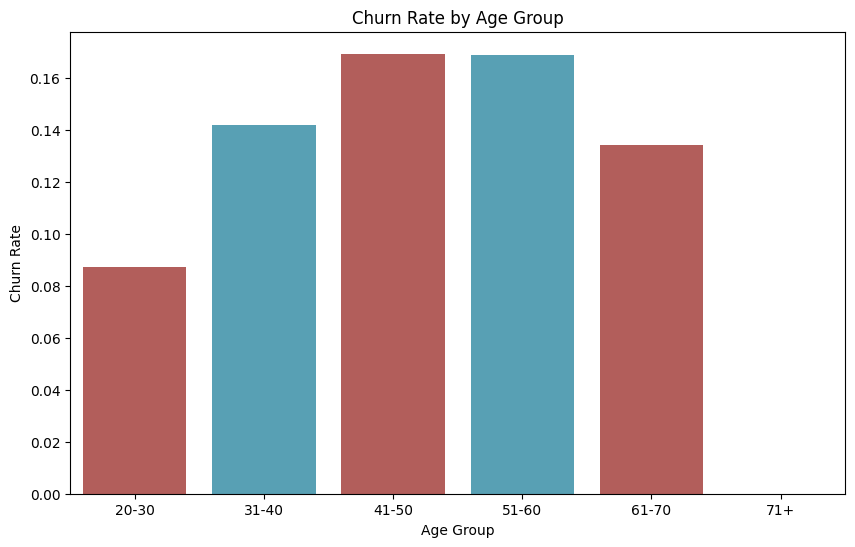


Age group with the highest churn rate: 41-50


In [ ]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, df['customer_age'].max()]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)

# Calculate churn rate by age group
churn_by_age_group = df.groupby('age_group')['attrition_flag'].value_counts(normalize=True).unstack().fillna(0)
churn_by_age_group['Churn Rate'] = churn_by_age_group['Attrited Customer']

# Create a bar plot of churn rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_age_group.index, y=churn_by_age_group['Churn Rate'], palette=[HEX_RED, HEX_BLUE])
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.show()

# Identify and print the age group with the highest churn rate
highest_churn_age_group = churn_by_age_group['Churn Rate'].idxmax()
print(f"\nAge group with the highest churn rate: {highest_churn_age_group}")

## Analisis hubungan tingkat pendidikan, pendapatan, dan churn

Analisis hubungan antara tingkat pendidikan dan pendapatan. Analisis hubungan antara tingkat pendidikan dan churn. Analisis hubungan antara pendapatan dan churn. Analisis hubungan gabungan antara tingkat pendidikan, pendapatan, dan churn.


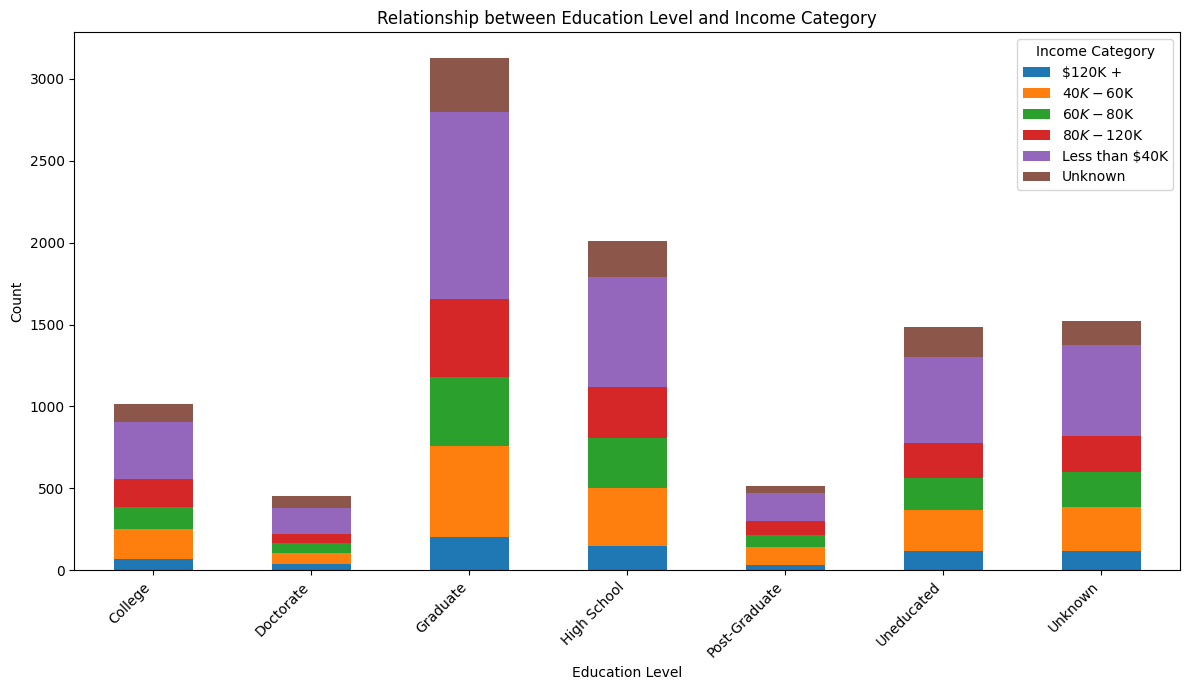

In [ ]:
education_income_crosstab = pd.crosstab(df['education_level'], df['income_category'])

education_income_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Relationship between Education Level and Income Category')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Category')
plt.tight_layout()
plt.show()

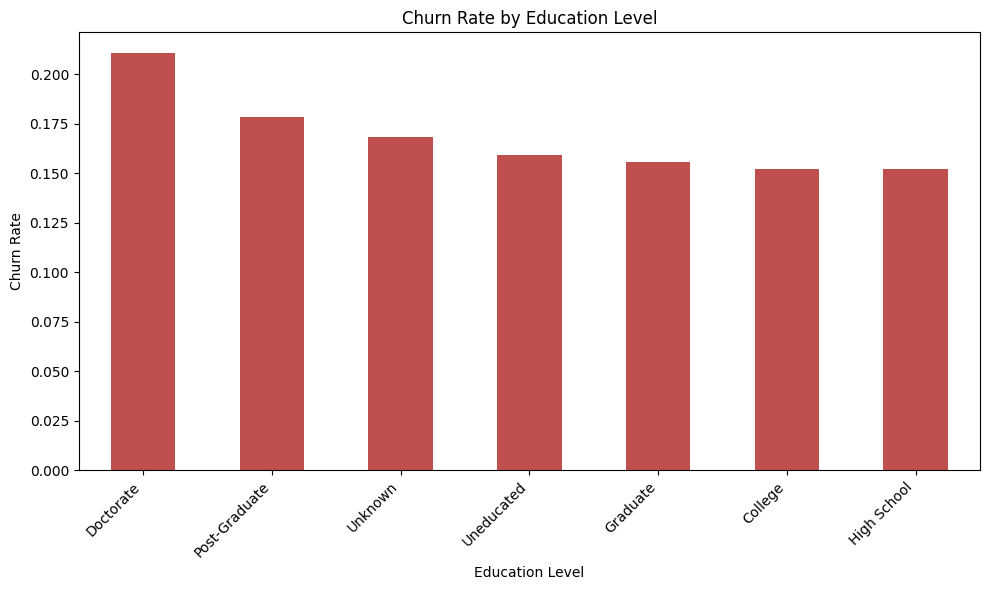

In [ ]:
education_churn_crosstab = pd.crosstab(df['education_level'], df['attrition_flag'], normalize='index')

education_churn_crosstab['Attrited Customer'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color=HEX_RED)
plt.title('Churn Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

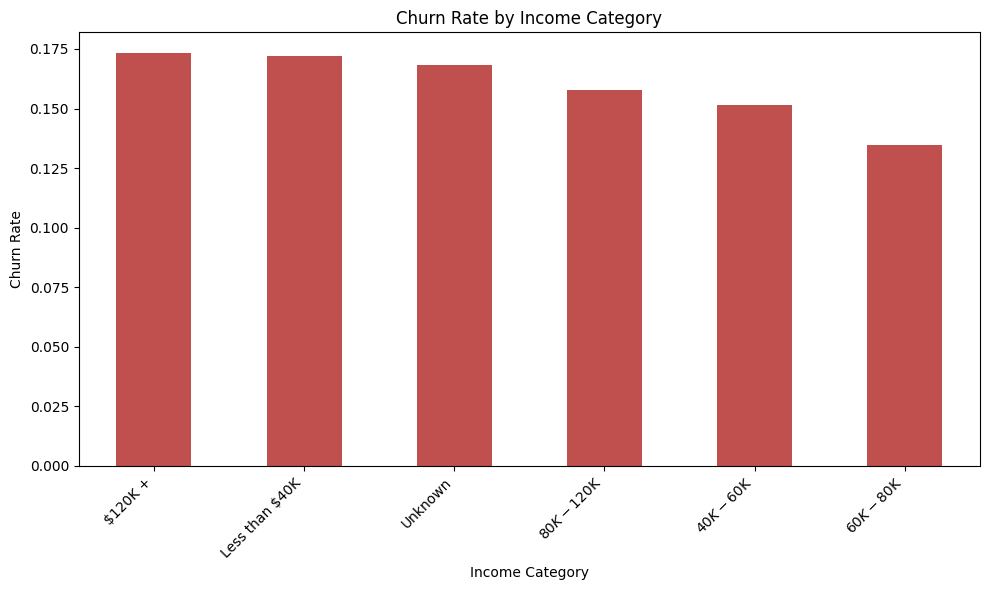

In [ ]:
income_churn_crosstab = pd.crosstab(df['income_category'], df['attrition_flag'], normalize='index')

income_churn_crosstab['Attrited Customer'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color=HEX_RED)
plt.title('Churn Rate by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

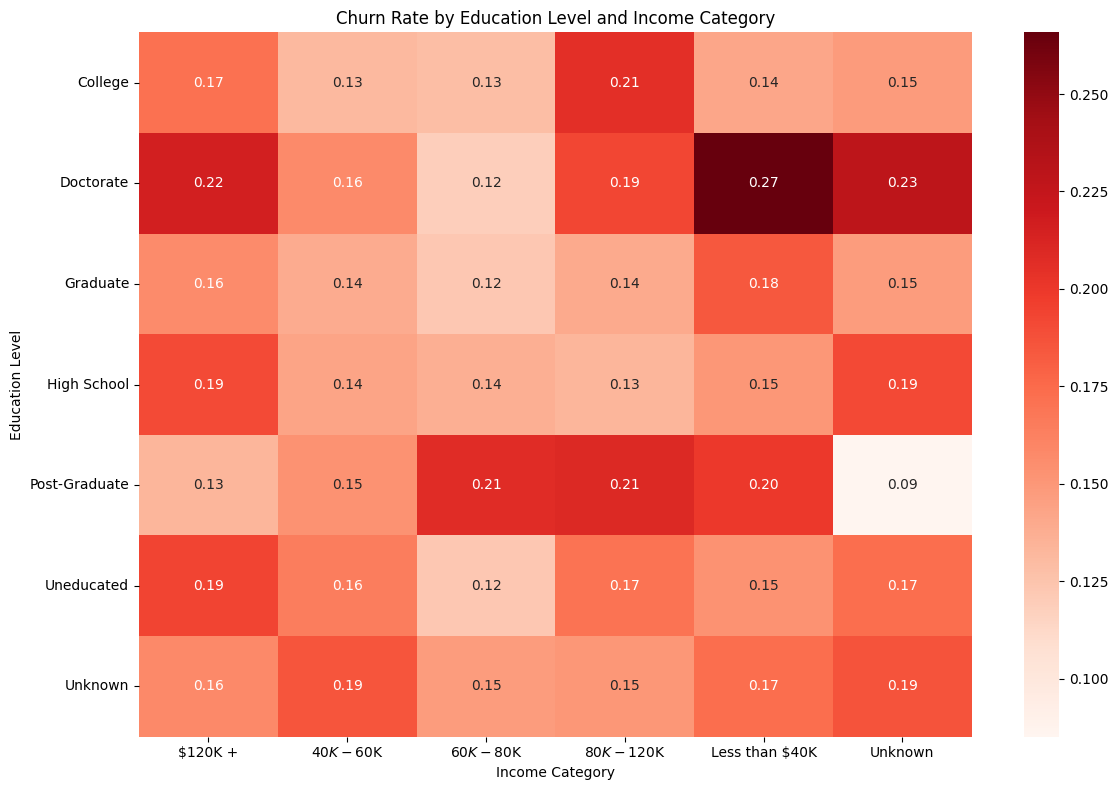

In [ ]:
education_income_churn = df.groupby(['education_level', 'income_category', 'attrition_flag']).size().unstack(fill_value=0)
education_income_churn['Total'] = education_income_churn['Attrited Customer'] + education_income_churn['Existing Customer']
education_income_churn['Churn Rate'] = education_income_churn['Attrited Customer'] / education_income_churn['Total']

plt.figure(figsize=(12, 8))
sns.heatmap(education_income_churn['Churn Rate'].unstack(), annot=True, cmap='Reds', fmt=".2f")
plt.title('Churn Rate by Education Level and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

## Identifikasi perbedaan churn berdasarkan gender

Analisis perbedaan tingkat churn antara pelanggan pria dan wanita menggunakan metode statistik yang sesuai (misalnya, uji chi-square atau visualisasi).


In [ ]:
churn_by_gender = df.groupby('gender')['attrition_flag'].value_counts(normalize=True).unstack().fillna(0)
churn_by_gender['Churn Rate'] = churn_by_gender['Attrited Customer']

print("Churn Rate by Gender:")
display(churn_by_gender[['Churn Rate']])

Churn Rate by Gender:


attrition_flag,Churn Rate
gender,
F,0.173572
M,0.146152


/tmp/ipython-input-1514247603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_gender.index, y=churn_by_gender['Churn Rate'], palette=[HEX_RED, HEX_BLUE])


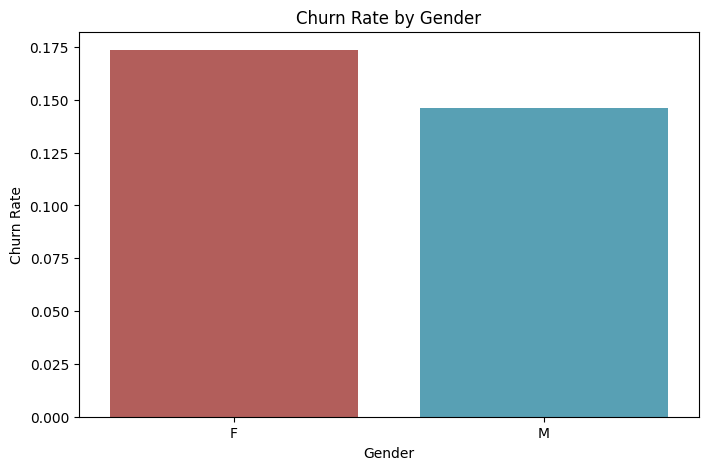

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender['Churn Rate'], palette=[HEX_RED, HEX_BLUE])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

## Analisis Hubungan Months on Book dan Churn

Churn Rate by Months on Book Group:


/tmp/ipython-input-2685329173.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_months_group = df.groupby('months_on_book_group')['attrition_flag'].value_counts(normalize=True).unstack().fillna(0)


attrition_flag,Churn Rate
months_on_book_group,
0-12,0.000000
13-24,0.148760
25-36,0.160760
37-48,0.161833
49+,0.169466


/tmp/ipython-input-2685329173.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_months_group.index, y=churn_by_months_group['Churn Rate'], palette=[HEX_RED, HEX_BLUE])
/tmp/ipython-input-2685329173.py:15: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_by_months_group.index, y=churn_by_months_group['Churn Rate'], palette=[HEX_RED, HEX_BLUE])


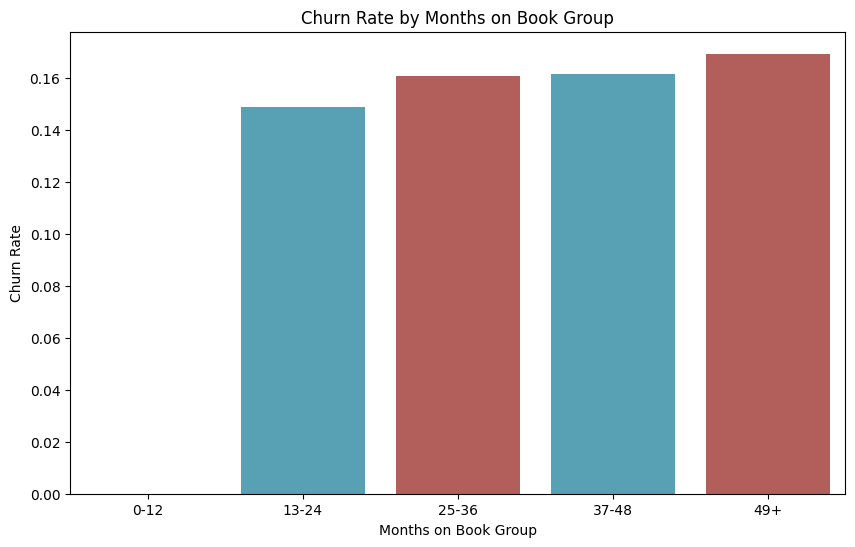

In [ ]:
# Create bins for months on book to analyze churn by tenure groups
months_bins = [0, 12, 24, 36, 48, df['months_on_book'].max()]
months_labels = ['0-12', '13-24', '25-36', '37-48', '49+']
df['months_on_book_group'] = pd.cut(df['months_on_book'], bins=months_bins, labels=months_labels, right=True)

# Calculate churn rate by months on book group
churn_by_months_group = df.groupby('months_on_book_group')['attrition_flag'].value_counts(normalize=True).unstack().fillna(0)
churn_by_months_group['Churn Rate'] = churn_by_months_group['Attrited Customer']

print("Churn Rate by Months on Book Group:")
display(churn_by_months_group[['Churn Rate']])

# Visualize churn rate by months on book group
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_months_group.index, y=churn_by_months_group['Churn Rate'], palette=[HEX_RED, HEX_BLUE])
plt.xlabel('Months on Book Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Months on Book Group')
plt.show()

In [ ]:
# Drop the 'months_on_book_group' column
df = df.drop('months_on_book_group', axis=1)
# Drop the 'months_on_book_group' column
df = df.drop('age_group', axis=1)

## Analisis Hubungan Contacts Count 12 Mon dan Churn


Churn Rate by Contacts Count 12 Mon:


attrition_flag,Churn Rate
contacts_count_12_mon,
0,0.017544
1,0.072048
2,0.124884
3,0.201479
4,0.226293
5,0.335227
6,1.000000


/tmp/ipython-input-606852954.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_contacts_count.index, y=churn_by_contacts_count['Churn Rate'], palette=[HEX_RED, HEX_BLUE])
/tmp/ipython-input-606852954.py:10: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_by_contacts_count.index, y=churn_by_contacts_count['Churn Rate'], palette=[HEX_RED, HEX_BLUE])


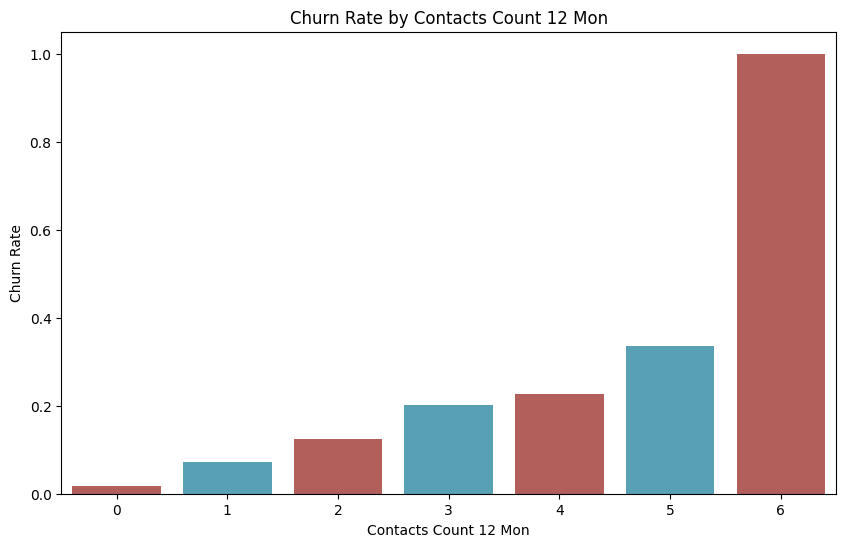

In [ ]:
# Calculate churn rate by contacts count 12 mon
churn_by_contacts_count = df.groupby('contacts_count_12_mon')['attrition_flag'].value_counts(normalize=True).unstack().fillna(0)
churn_by_contacts_count['Churn Rate'] = churn_by_contacts_count['Attrited Customer']

print("\nChurn Rate by Contacts Count 12 Mon:")
display(churn_by_contacts_count[['Churn Rate']])

# Visualize churn rate by contacts count 12 mon
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_contacts_count.index, y=churn_by_contacts_count['Churn Rate'], palette=[HEX_RED, HEX_BLUE])
plt.xlabel('Contacts Count 12 Mon')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contacts Count 12 Mon')
plt.show()

In [ ]:
# Filter the DataFrame to show rows where 'contacts_count_12_mon' is 6
customers_with_6_contacts = df[df['contacts_count_12_mon'] == 6]

print("\nCustomers with 6 contacts in the last 12 months:")
display(customers_with_6_contacts)


Customers with 6 contacts in the last 12 months:


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3049,715570533,Attrited Customer,48,M,3,Post-Graduate,Unknown,$120K +,Blue,35,...,2,6,34516.0,0,34516.0,0.464,1632,44,0.333,0.000
3157,710658483,Attrited Customer,47,M,4,Graduate,Unknown,$40K - $60K,Blue,34,...,3,6,9080.0,2174,6906.0,0.653,2098,46,0.586,0.239
3366,719657583,Attrited Customer,44,M,3,Graduate,Married,$40K - $60K,Blue,40,...,2,6,9502.0,2457,7045.0,0.915,2310,57,0.676,0.259
3436,794560833,Attrited Customer,47,F,3,Graduate,Married,$40K - $60K,Blue,31,...,3,6,5496.0,0,5496.0,0.548,1913,34,0.308,0.000
3851,717840108,Attrited Customer,48,M,4,Unknown,Married,$80K - $120K,Blue,41,...,3,6,4806.0,1357,3449.0,0.573,1771,35,0.346,0.282
3988,720598308,Attrited Customer,47,M,4,Uneducated,Single,$120K +,Blue,37,...,2,6,34516.0,1126,33390.0,0.575,1736,35,0.400,0.033
4189,772341783,Attrited Customer,45,F,3,High School,Single,Unknown,Blue,35,...,2,6,3512.0,2517,995.0,0.597,1801,48,0.548,0.717
4339,720551733,Attrited Customer,46,F,4,Doctorate,Married,Unknown,Blue,26,...,3,6,15195.0,0,15195.0,0.726,2631,41,0.640,0.000
4593,719328858,Attrited Customer,56,M,4,High School,Married,$60K - $80K,Blue,43,...,2,6,4535.0,0,4535.0,0.831,2342,40,0.600,0.000
4740,716625033,Attrited Customer,32,F,1,Graduate,Single,Less than $40K,Blue,36,...,3,6,2761.0,0,2761.0,1.047,2753,43,0.654,0.000


## Ringkasan temuan eksplorasi data

Synthesize the findings from the previous analyses to summarize the key insights regarding customer churn based on age, education level, income category, and gender.



## Summary:

### Data Analysis Key Findings

*   The majority of customers are between 35 and 55 years old, with the highest churn rate observed in the 41-50 age group.
*   Higher education levels are generally associated with higher income categories.
*   Churn rates vary depending on individual education levels and income categories.
*   The combined analysis of education level and income category shows specific combinations with significantly higher or lower churn rates.
*   Female customers exhibit a slightly higher churn rate (approximately 17.36%) compared to male customers (approximately 14.62%).

### Insights or Next Steps

*   Targeted retention strategies could be developed for the 41-50 age group, as they show the highest churn propensity.
*   Further analysis into the reasons for higher churn within specific combinations of education level and income category could provide deeper insights for tailored interventions.


## Target variable encoding





Encode the target variable 'attrition_flag' using LabelEncoder and verify the transformation.



In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'attrition_flag' column
df['attrition_flag_encoded'] = label_encoder.fit_transform(df['attrition_flag'])

# Verify the transformation
print("Unique values after encoding:", df['attrition_flag_encoded'].unique())
print("Data type after encoding:", df['attrition_flag_encoded'].dtype)

Unique values after encoding: [1 0]
Data type after encoding: int64


## Handle categorical features

Apply appropriate encoding techniques to categorical features (e.g., One-Hot Encoding for nominal variables, Ordinal Encoding for ordinal variables). Consider the 'Unknown' category and how to handle it.


In [ ]:
# Identify categorical columns to encode. Exclude the original target variable 'attrition_flag',
# and the engineered 'age_group' which is already handled as it's based on numerical data.
# We only need to encode the columns that are still of object dtype and are not the target variable.
categorical_cols_to_encode = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_to_encode.remove('attrition_flag')

# Based on previous analysis, the object columns remaining after excluding the target and engineered features are:
# 'gender', 'education_level', 'marital_status', 'income_category', 'card_category'

# Define nominal and ordinal columns from the remaining object columns
nominal_cols = ['gender', 'marital_status', 'card_category']
ordinal_cols = ['education_level', 'income_category']

# Define the order for ordinal categories, placing 'Unknown' appropriately or treating it as a distinct category.
# For 'education_level', a possible order from lowest to highest: Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown.
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']

# For 'income_category', a possible order from lowest to highest: Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, $120K +', Unknown.
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']


# Apply One-Hot Encoding to nominal columns
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Apply Ordinal Encoding to ordinal columns
ordinal_encoder = OrdinalEncoder(categories=[education_order, income_order], handle_unknown='use_encoded_value', unknown_value=-1)
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])


# Display the first few rows and data types of the updated DataFrame
print("DataFrame after encoding:")
display(df.head())
print("\nData types after encoding:")
display(df.dtypes)

DataFrame after encoding:


,user_id,attrition_flag,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,...,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag_encoded,gender_M,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
0,768805383,Existing Customer,45,3,1.0,2.0,39,5,1,3,...,1.625,0.061,1,True,True,False,False,False,False,False
1,818770008,Existing Customer,49,5,3.0,0.0,44,6,1,2,...,3.714,0.105,1,False,False,True,False,False,False,False
2,713982108,Existing Customer,51,3,3.0,3.0,36,4,1,0,...,2.333,0.000,1,True,True,False,False,False,False,False
3,769911858,Existing Customer,40,4,1.0,0.0,34,3,4,1,...,2.333,0.760,1,False,False,False,True,False,False,False
4,709106358,Existing Customer,40,3,0.0,2.0,21,5,1,0,...,2.500,0.000,1,True,True,False,False,False,False,False



Data types after encoding:


,0
user_id,int64
attrition_flag,object
customer_age,int64
dependent_count,int64
education_level,float64
income_category,float64
months_on_book,int64
total_relationship_count,int64
months_inactive_12_mon,int64
contacts_count_12_mon,int64


## Split data

Split the dataset into training and testing sets to evaluate the model's performance.


In [ ]:
# Define features (X) and target variable (y)
X = df.drop(['user_id', 'attrition_flag', 'attrition_flag_encoded'], axis=1)
y = df['attrition_flag_encoded']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8101, 23)
Shape of X_test: (2026, 23)
Shape of y_train: (8101,)
Shape of y_test: (2026,)


## Handle numerical features

Although no major issues were found during validity checks, consider scaling numerical features if the chosen model is sensitive to feature scaling.

In [ ]:
# Identify numerical columns, excluding 'user_id' and 'attrition_flag_encoded'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('user_id')
numerical_cols.remove('attrition_flag_encoded')

In [ ]:
# Inisialisasi scaler lalu FIT di TRAIN saja
scaler = MinMaxScaler()
X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform TEST pakai scaler yang sama (tanpa fit)
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])

# Cek
print("Scaled numerical columns (train, first 5 rows):")
display(X_train[numerical_cols].head())

print("\nSummary statistics (train, scaled):")
display(X_train[numerical_cols].describe())

Scaled numerical columns (train, first 5 rows):


/tmp/ipython-input-16396875.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.59574468 0.53191489 0.40425532 ... 0.5106383  0.36170213 0.59574468]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
/tmp/ipython-input-16396875.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6 0.  0.8 ... 0.2 1.  0.4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
/tmp/ipython-input-16396875.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8372093  0.74418605 0.37209302 ... 0.53488372 0.53488372 0.53488372]' has dtype incompatible with int

,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
1602,0.595745,0.6,0.333333,1.0,0.837209,1.0,0.333333,0.500000,0.355094,0.000000,0.381914,0.343244,0.084494,0.178295,0.050126,0.000000
7791,0.531915,0.0,0.166667,0.6,0.744186,0.4,0.333333,0.500000,0.278426,1.000000,0.235505,0.208419,0.245071,0.612403,0.273873,0.236236
7177,0.404255,0.8,0.166667,0.2,0.372093,0.4,0.333333,0.166667,0.095433,0.707588,0.081448,0.208419,0.179124,0.449612,0.152618,0.388388
97,0.574468,0.6,0.833333,0.2,0.511628,0.8,0.500000,0.333333,0.071066,0.677791,0.060267,0.308213,0.060098,0.248062,0.190423,0.450450
4820,0.468085,0.4,0.500000,1.0,0.627907,0.4,0.333333,0.666667,0.110821,0.292412,0.126474,0.199882,0.190097,0.527132,0.194903,0.144144



Summary statistics (train, scaled):


,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,0.432492,0.470115,0.441406,0.349266,0.533448,0.564177,0.389252,0.408324,0.217606,0.461829,0.216463,0.223725,0.215162,0.424436,0.199360,0.274412
std,0.169910,0.259366,0.321768,0.342638,0.185057,0.309401,0.167058,0.183986,0.275351,0.323671,0.263874,0.064611,0.189205,0.182063,0.066741,0.274984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319149,0.200000,0.166667,0.000000,0.441860,0.400000,0.333333,0.333333,0.033699,0.141836,0.038594,0.185752,0.090286,0.271318,0.163260,0.023023
50%,0.425532,0.400000,0.500000,0.200000,0.534884,0.600000,0.333333,0.333333,0.094042,0.508145,0.099904,0.217251,0.187145,0.441860,0.196024,0.176176
75%,0.553191,0.600000,0.500000,0.600000,0.627907,0.800000,0.500000,0.500000,0.291093,0.707588,0.286327,0.253165,0.233931,0.542636,0.229067,0.503504
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Select a model

Choose an appropriate machine learning algorithm for binary classification (churn prediction).


## Train the model



Initialize and train an XGBoost classifier using the prepared training data.



In [ ]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Print a confirmation message
print("XGBoost model training complete.")

XGBoost model training complete.


## Evaluate model performance

Use appropriate validation techniques (e.g., cross-validation) and metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC) to evaluate the model's performance on the testing data.


In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

# Predict churn probability on the test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Predict the churn class on the test set
y_pred = xgb_model.predict(X_test)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the calculated ROC AUC score and the classification report
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(class_report)

ROC AUC Score: 0.9931

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       325
           1       0.98      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



## Establish a baseline model

Create a simple baseline model (e.g., a model that always predicts the majority class) to compare the performance of the developed model against.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize and train a Logistic Regression model as the baseline
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_baseline_pred = baseline_model.predict(X_test)
y_baseline_pred_proba = baseline_model.predict_proba(X_test)[:, 1]

# Calculate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, y_baseline_pred)
print(f"Baseline Model Accuracy (Logistic Regression): {baseline_accuracy:.4f}")

# Calculate the ROC AUC score for the baseline model
baseline_roc_auc = roc_auc_score(y_test, y_baseline_pred_proba)
print(f"Baseline Model ROC AUC (Logistic Regression): {baseline_roc_auc:.4f}")

Baseline Model Accuracy (Logistic Regression): 0.9047
Baseline Model ROC AUC (Logistic Regression): 0.9168


## Compare model performance

Compare the performance metrics of the developed model with the baseline model.


In [ ]:
# Print ROC AUC comparison
print(f"XGBoost Model ROC AUC: {roc_auc:.4f}")
print(f"Baseline Model ROC AUC: {baseline_roc_auc:.4f}")

# Print Accuracy comparison
print(f"\nXGBoost Model Accuracy: {xgb_model.score(X_test, y_test):.4f}")
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")

# Summarize the performance difference
print("\nPerformance Comparison Summary:")
print(f"The XGBoost model achieved a significantly higher ROC AUC score ({roc_auc:.4f}) compared to the baseline model ({baseline_roc_auc:.4f}), indicating its strong ability to distinguish between churn and non-churn customers.")
print(f"The XGBoost model also demonstrated substantially better accuracy ({xgb_model.score(X_test, y_test):.4f}) than the baseline model ({baseline_accuracy:.4f}), showing a considerable improvement in overall correct predictions.")

XGBoost Model ROC AUC: 0.9931
Baseline Model ROC AUC: 0.9168

XGBoost Model Accuracy: 0.9729
Baseline Model Accuracy: 0.9047

Performance Comparison Summary:
The XGBoost model achieved a significantly higher ROC AUC score (0.9931) compared to the baseline model (0.9168), indicating its strong ability to distinguish between churn and non-churn customers.
The XGBoost model also demonstrated substantially better accuracy (0.9729) than the baseline model (0.9047), showing a considerable improvement in overall correct predictions.


## Feature importance
Analyze the importance of different features in predicting churn.


In [ ]:
# Get feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a pandas Series with feature names as the index
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Sorted Feature Importances:")
display(sorted_feature_importances)

Sorted Feature Importances:


,0
total_trans_ct,0.245410
total_revolving_bal,0.192592
total_relationship_count,0.116046
total_trans_amt,0.063690
total_ct_chng_q4_q1,0.058554
months_inactive_12_mon,0.048999
gender_M,0.030028
customer_age,0.029895
avg_open_to_buy,0.029717
contacts_count_12_mon,0.029302


## Summary:

### Machine Learning Modeling

1.  **Model Selection**: An XGBoost classifier was chosen for churn prediction, which is suitable for binary classification tasks and known for its strong performance.
2.  **Model Training**: The XGBoost model was trained on the prepared training dataset (`X_train`, `y_train`).
3.  **Model Evaluation**: The model's performance was evaluated on the test set (`X_test`, `y_test`) using ROC AUC and the classification report (including precision, recall, and F1-score). The XGBoost model achieved a high ROC AUC of 0.9931 and an accuracy of 0.9729.
4.  **Baseline Model Comparison**: A Logistic Regression model was used as a baseline. The baseline model achieved an ROC AUC of 0.9169 and an accuracy of 0.9047.
5.  **Performance Comparison**: The comparison clearly shows that the XGBoost model significantly outperforms the Logistic Regression baseline model in both ROC AUC and accuracy, indicating its effectiveness in predicting customer churn for this dataset.

### Next Steps

*   Further analysis of feature importance could provide insights into which features are most influential in predicting churn.
*   Hyperparameter tuning of the XGBoost model could potentially further improve performance.
*   Deployment of the trained model for making predictions on new data.

## Visualize Model Performance Comparison

Visualize the ROC curve and Precision-Recall curve for both the XGBoost model and the baseline Logistic Regression model to compare their performance visually.

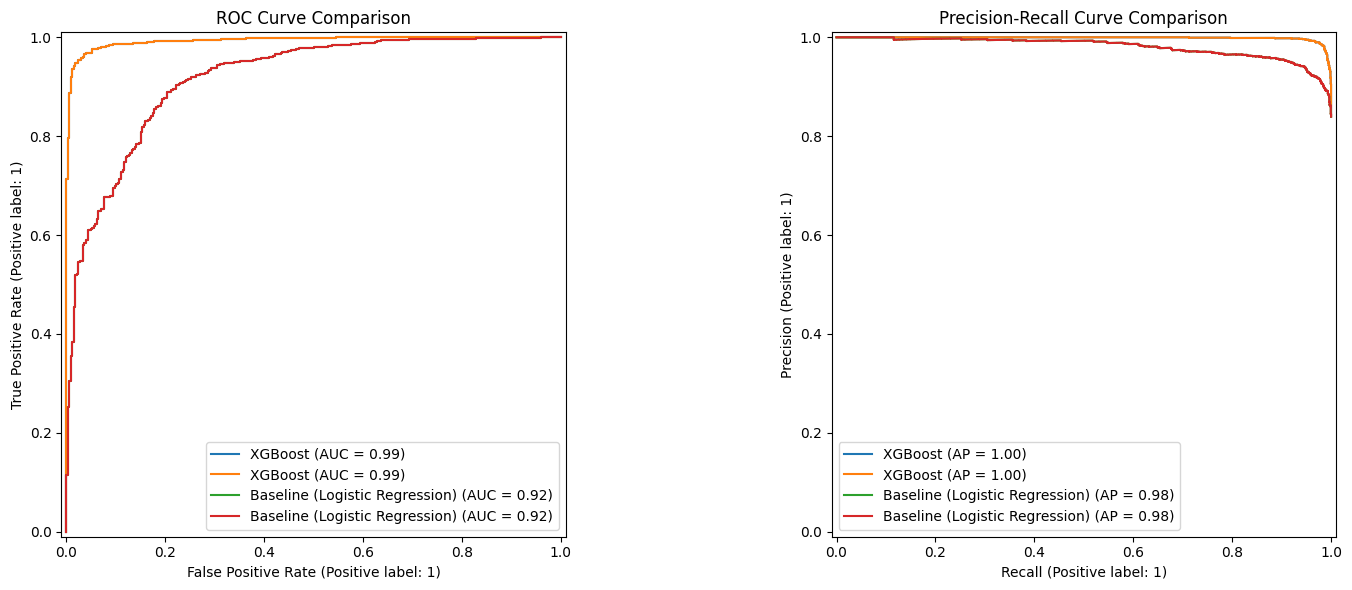

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ROC curves in the first subplot
ax_roc = axes[0]
roc_display_xgb = RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax_roc, name="XGBoost")
roc_display_xgb.plot(ax=ax_roc)

roc_display_baseline = RocCurveDisplay.from_estimator(baseline_model, X_test, y_test, ax=ax_roc, name="Baseline (Logistic Regression)")
roc_display_baseline.plot(ax=ax_roc)

ax_roc.set_title('ROC Curve Comparison')

# Plot Precision-Recall curves in the second subplot
ax_pr = axes[1]
pr_display_xgb = PrecisionRecallDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax_pr, name="XGBoost")
pr_display_xgb.plot(ax=ax_pr)

pr_display_baseline = PrecisionRecallDisplay.from_estimator(baseline_model, X_test, y_test, ax=ax_pr, name="Baseline (Logistic Regression)")
pr_display_baseline.plot(ax=ax_pr)

ax_pr.set_title('Precision-Recall Curve Comparison')

plt.tight_layout()
plt.show()

## Xgboost feature importance

Analyze feature importance directly from the XGBoost model using built-in methods like `plot_importance` with different importance types ('weight' and 'gain').


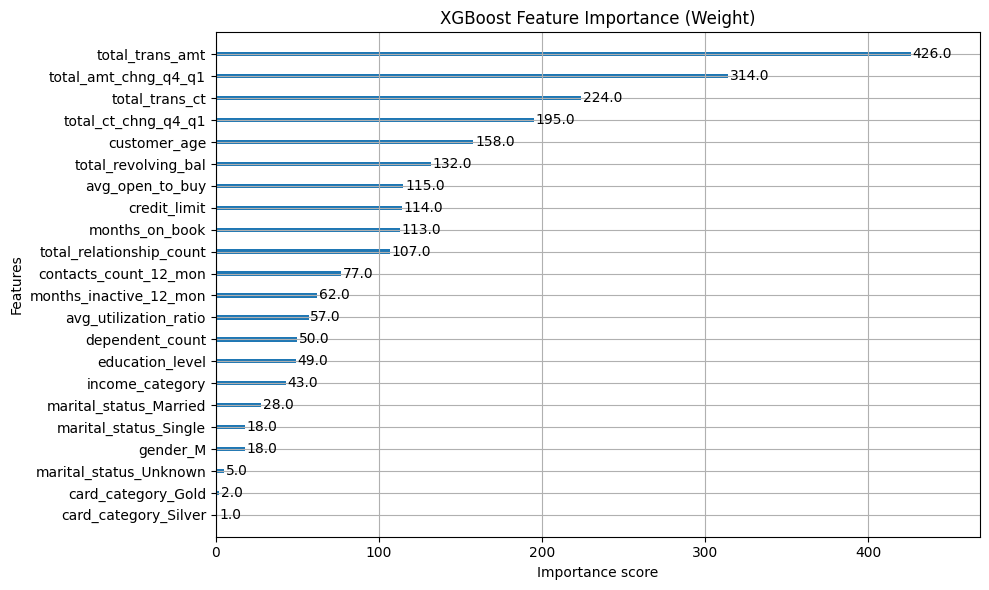

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance with 'weight'
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, ax=ax1, importance_type='weight')
ax1.set_title('XGBoost Feature Importance (Weight)')
plt.tight_layout()
plt.show()

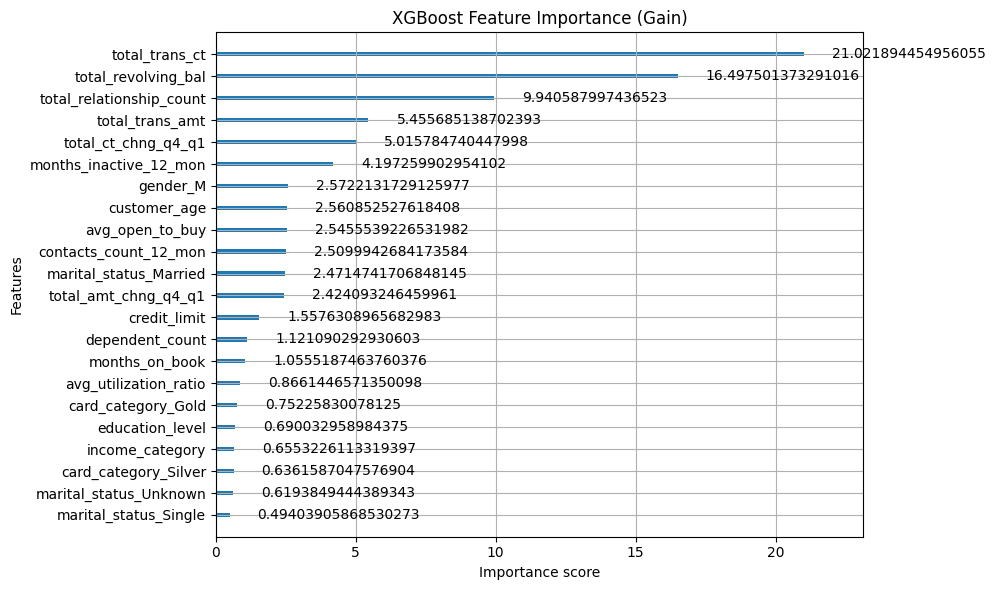

In [ ]:
# Plot feature importance with 'gain'
fig2, ax2 = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, ax=ax2, importance_type='gain')
ax2.set_title('XGBoost Feature Importance (Gain)')
plt.tight_layout()
plt.show()

## Permutation feature importance


Calculate and display permutation feature importance on the test set to understand feature relevance for model prediction.



In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Calculate permutation importance on the test set
result = permutation_importance(
    xgb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Create a pandas Series of the mean permutation importances
perm_importance_mean = pd.Series(result.importances_mean, index=X_test.columns)

# Sort the mean permutation importances in descending order
sorted_perm_importance_mean = perm_importance_mean.sort_values(ascending=False)

# Print the sorted mean permutation importances
print("Sorted Mean Permutation Importances:")
display(sorted_perm_importance_mean)

Sorted Mean Permutation Importances:


,0
total_trans_ct,1.812438e-01
total_trans_amt,1.179171e-01
total_relationship_count,2.265548e-02
total_revolving_bal,1.707799e-02
total_amt_chng_q4_q1,1.579467e-02
total_ct_chng_q4_q1,1.085884e-02
months_inactive_12_mon,7.255676e-03
customer_age,6.811451e-03
contacts_count_12_mon,4.935834e-03
credit_limit,2.566634e-03


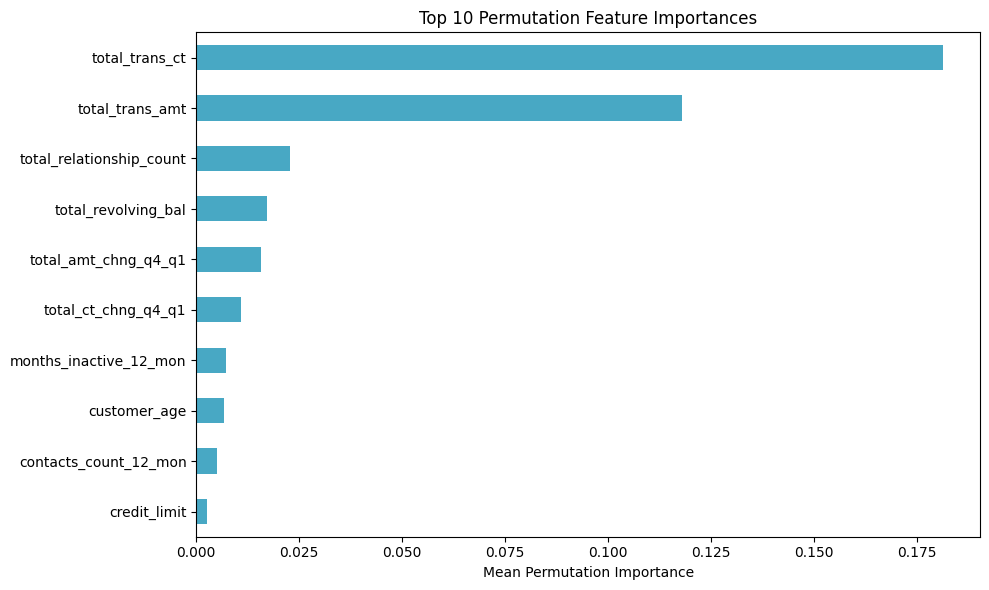

In [ ]:
# Create a horizontal bar plot of the top 10 mean permutation importances
plt.figure(figsize=(10, 6))
sorted_perm_importance_mean.head(10).plot(kind='barh', color=HEX_BLUE)
plt.xlabel('Mean Permutation Importance')
plt.title('Top 10 Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Calculate and display SHAP values to understand the contribution of each feature to individual predictions and overall model output.



SHAP Summary Plot:


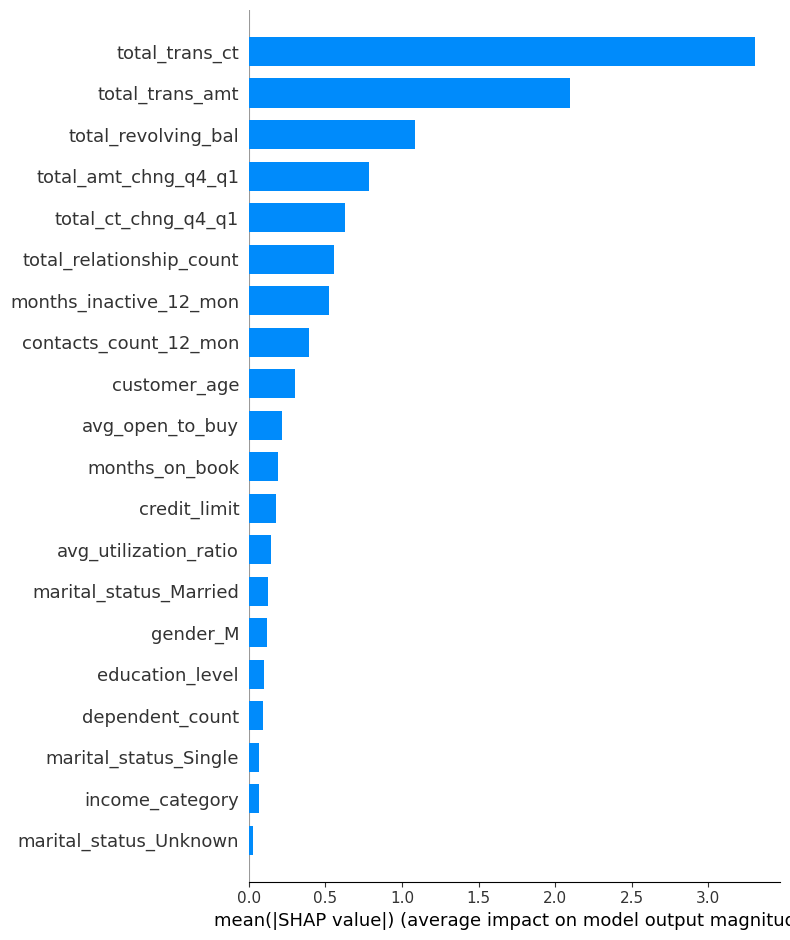

In [ ]:
import shap

# Create a SHAP Tree explainer for the XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values
print("SHAP Summary Plot:")
shap.summary_plot(shap_values, X_test, plot_type="bar")


SHAP Summary Plot (beeswarm):


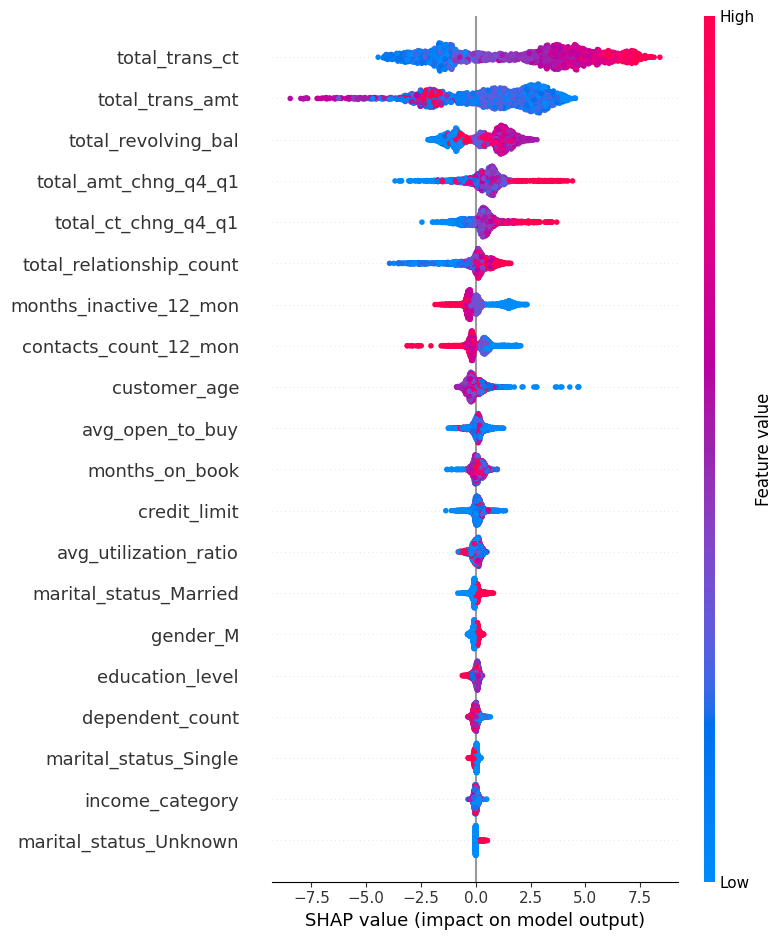

In [ ]:
print("\nSHAP Summary Plot (beeswarm):")
shap.summary_plot(shap_values, X_test)

## Partial dependence plots (pdp)


Generate Partial Dependence Plots for the most important features to visualize their effect on churn probability.



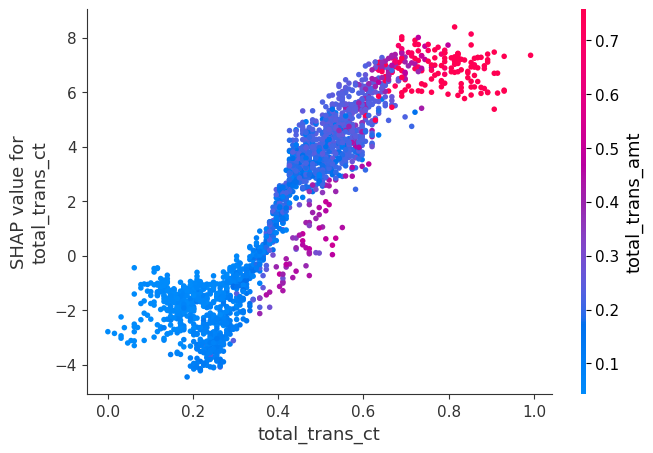

In [ ]:
shap.dependence_plot(
  'total_trans_ct',
  shap_values,
  X_test,
)

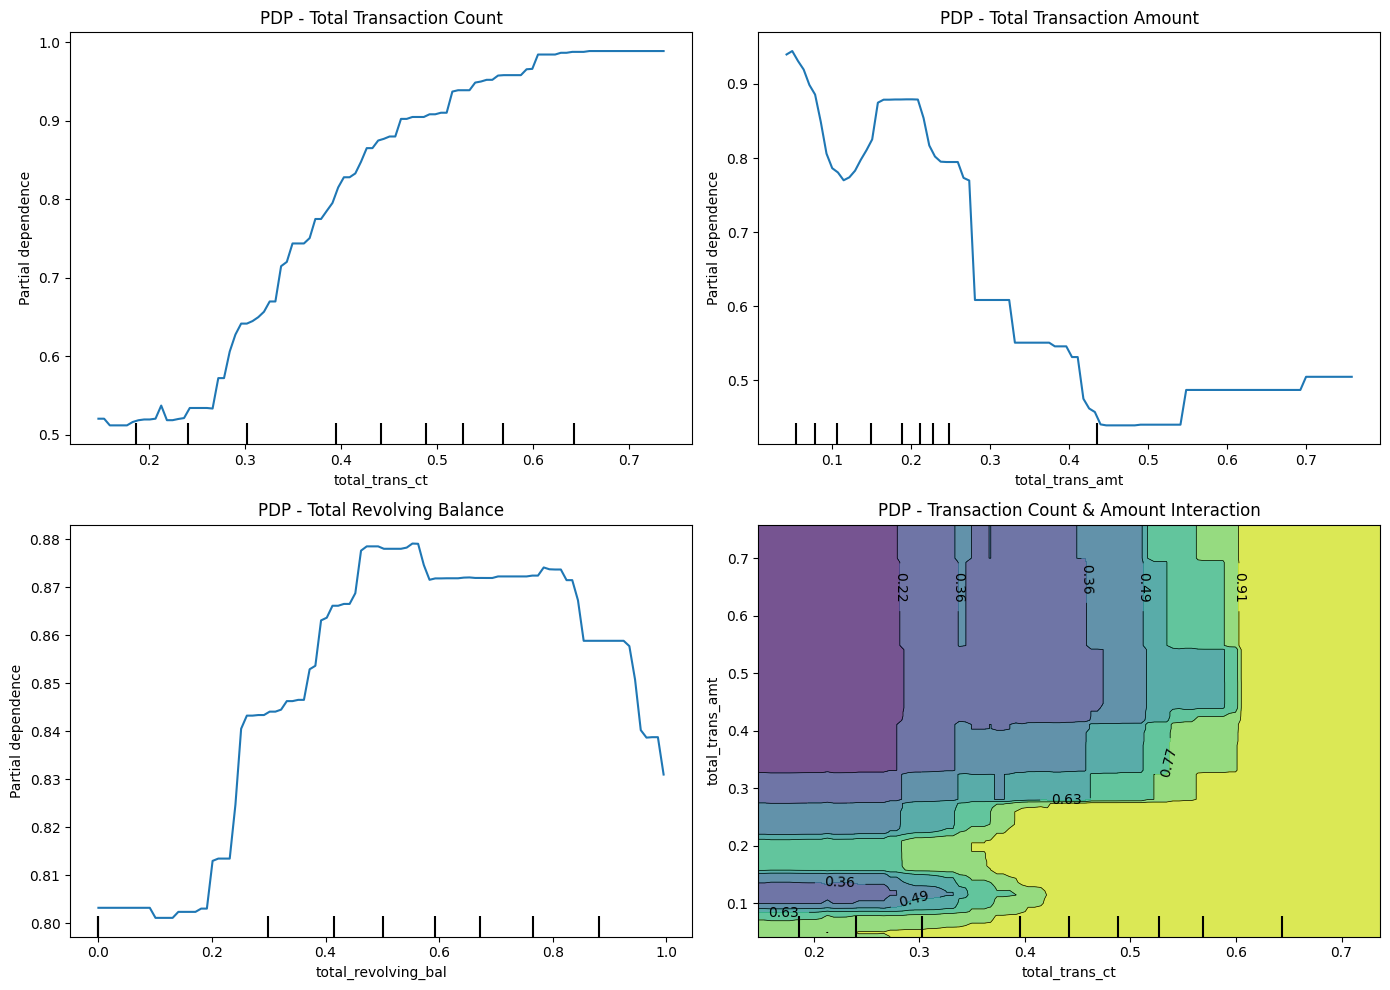

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Select top features based on previous analyses
top_features = ['total_trans_ct', 'total_trans_amt', 'total_revolving_bal']

# Generate 2x2 PDP plots: 3 single features + 1 two-way feature interaction
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Single feature plots
PartialDependenceDisplay.from_estimator(xgb_model, X_test, ['total_trans_ct'], ax=ax[0, 0])
ax[0, 0].set_title('PDP - Total Transaction Count')

PartialDependenceDisplay.from_estimator(xgb_model, X_test, ['total_trans_amt'], ax=ax[0, 1])
ax[0, 1].set_title('PDP - Total Transaction Amount')

PartialDependenceDisplay.from_estimator(xgb_model, X_test, ['total_revolving_bal'], ax=ax[1, 0])
ax[1, 0].set_title('PDP - Total Revolving Balance')

# Two-way feature interaction
PartialDependenceDisplay.from_estimator(xgb_model, X_test, [('total_trans_ct', 'total_trans_amt')], ax=ax[1, 1])
ax[1, 1].set_title('PDP - Transaction Count & Amount Interaction')

plt.tight_layout()
plt.show()

## 📊 Summary of Model Interpretability Analysis

### 🔹 Built-in XGBoost Feature Importance (Weight and Gain)
- The built-in feature importance plots (**weight** and **gain**) provide an initial understanding of which features are used most frequently in the model's decision-making process (weight) and which contribute most to reducing impurity (gain).
- **`total_trans_ct`** and **`total_revolving_bal`** consistently appear as important features across both types of built-in importance.

### 🔹 Permutation Feature Importance
- Permutation importance measures the decrease in model performance when a single feature's values are randomly shuffled, indicating how much the model relies on that feature for accurate predictions.
- The permutation importance analysis on the test set confirms that **`total_trans_ct`** and **`total_trans_amt`** are the most important features, followed by **`total_relationship_count`** and **`total_revolving_bal`**.

### 🔹 Partial Dependence Plots (PDP)
- Partial Dependence Plots visualize the marginal effect of one or two features on the predicted outcome, showing how the model's prediction changes as the feature value changes, while averaging over the effects of all other features.
- The PDP for **`total_trans_ct`** shows that as the total transaction count increases, the probability of churn significantly decreases.
- The PDP for **`total_trans_amt`** indicates that higher total transaction amounts are associated with a lower probability of churn.
- The PDP for **`total_revolving_bal`** suggests that a higher total revolving balance generally leads to a lower churn probability.
- The 2-way PDP for **`total_trans_ct`** and **`total_trans_amt`** further illustrates that high values in both features strongly correlate with a lower churn probability.

### 🔹 SHAP Analysis
- **SHAP (SHapley Additive exPlanations)** values provide a way to explain the contribution of each feature to the prediction for every individual instance.
- The SHAP summary plots (bar and beeswarm) corroborate the findings from the feature importance methods, identifying **`total_trans_ct`**, **`total_trans_amt`**, and **`total_revolving_bal`** as the most impactful features on the model's output.
- The beeswarm plot additionally shows the distribution of SHAP values for each feature, revealing how the feature values (color-coded from low to high) influence the prediction (positive or negative SHAP values). For example, higher **`total_trans_ct`** and **`total_trans_amt`** generally lead to lower churn probability, while lower values tend to increase churn probability.

### 🔑 Overall Key Factors Influencing Churn
Based on the combined analysis (built-in importance, permutation importance, PDP, and SHAP), the most influential factors in predicting customer churn are primarily related to customer activity and engagement:
- **Transaction Count (`total_trans_ct`)**: Total number of transactions in the last 12 months. Higher transaction counts are associated with lower churn probability.
- **Transaction Amount (`total_trans_amt`)**: Total transaction amount in the last 12 months. Higher transaction amounts are associated with lower churn probability.
- **Total Revolving Balance (`total_revolving_bal`)**: Outstanding balance on the credit card. Higher revolving balances are associated with lower churn probability.
- **Total Relationship Count (`total_relationship_count`)**: Number of products held by the customer.

📌 Customers with **low transaction activity, low balances, and fewer products** are more likely to churn.

# Laporan Analisis Prediksi Churn Pelanggan

## Ringkasan Eksekutif

Laporan ini menyajikan temuan kunci dari analisis data pelanggan dan pengembangan model prediksi *churn* untuk mengidentifikasi faktor-faktor yang mempengaruhi keputusan pelanggan untuk berhenti menggunakan layanan bank. Model *XGBoost* yang dikembangkan menunjukkan kinerja yang unggul dibandingkan *baseline model*, dan analisis interpretasi model telah mengidentifikasi pendorong utama *churn*. Rekomendasi bisnis berdasarkan temuan ini disediakan untuk membantu tim mengambil keputusan strategis guna mengurangi *churn* pelanggan.

## Temuan Kunci dari Analisis Data

*   **Distribusi Usia dan Churn**: Mayoritas nasabah berada pada rentang usia 35-55 tahun. Kelompok usia **41-60 tahun** menunjukkan kemungkinan *churn* terbesar.
*   **Tingkat Pendidikan, Pendapatan, dan Churn**: Terdapat korelasi antara tingkat pendidikan dan kategori pendapatan. Analisis menunjukkan bahwa kombinasi tingkat pendidikan dan pendapatan tertentu memiliki tingkat *churn* yang bervariasi.
*   **Perbedaan Churn Berdasarkan Gender**: Pelanggan **wanita** menunjukkan tingkat *churn* yang sedikit lebih tinggi (sekitar 17.36%) dibandingkan pelanggan pria (sekitar 14.62%).
*   **Durasi Menjadi Nasabah (Months on Book)**  
Berdasarkan analisis terbaru, pola churn justru berlawanan dengan asumsi awal.  
Semakin lama seorang nasabah menjadi pelanggan (*months_on_book* lebih tinggi), semakin besar kemungkinan mereka untuk churn.  
Hal ini mungkin menunjukkan adanya **kejenuhan atau menurunnya loyalitas** setelah periode tertentu.
*   **Intensitas Interaksi (Contacts Count 12 Mon)**  
Analisis terbaru memperlihatkan bahwa semakin tinggi frekuensi interaksi nasabah dengan bank dalam 12 bulan terakhir, semakin besar pula kemungkinan churn.  
Bahkan, pada nilai **contacts_count_12_mon = 6**, seluruh nasabah tercatat mengalami churn (*100% churn rate*).  
Pola ini bisa mengindikasikan bahwa **banyaknya interaksi mungkin terjadi karena masalah atau ketidakpuasan nasabah**, sehingga mereka lebih rentan meninggalkan layanan.


## Pemodelan Machine Learning

*   Model prediksi *churn* dibangun menggunakan algoritma **XGBoost**.
*   Model dievaluasi menggunakan metrik seperti **ROC AUC** dan **Accuracy**. Model *XGBoost* mencapai **ROC AUC 0.9931** dan **Accuracy 0.9729** pada data uji.
*   Perbandingan dengan *baseline model* (Logistic Regression) menunjukkan bahwa model *XGBoost* memiliki performa yang jauh lebih baik (Baseline ROC AUC: 0.9169, Baseline Accuracy: 0.9047).
*   Metrik **ROC AUC** sangat relevan untuk meyakinkan *stakeholder* karena menunjukkan kemampuan model dalam membedakan antara pelanggan yang akan *churn* dan tidak, bahkan pada *threshold* yang berbeda. Visualisasi **Kurva ROC** dan **Kurva Precision-Recall** secara jelas menggambarkan keunggulan model *XGBoost*.

## Analisis Interpretabilitas Model

Analisis menggunakan *Built-in XGBoost Feature Importance*, *Permutation Feature Importance*, *Partial Dependence Plots*, dan **SHAP** mengidentifikasi fitur-fitur paling berpengaruh dalam prediksi *churn*:

*   **Total Transaction Count (total_trans_ct)**: Jumlah transaksi dalam 12 bulan terakhir. Jumlah transaksi yang lebih tinggi berkorelasi dengan kemungkinan *churn* yang lebih rendah.
*   **Total Transaction Amount (total_trans_amt)**: Total nominal transaksi dalam 12 bulan terakhir. Jumlah nominal transaksi yang lebih tinggi berkorelasi dengan kemungkinan *churn* yang lebih rendah.
*   **Total Revolving Balance (total_revolving_bal)**: Saldo terutang pada kartu kredit. Saldo yang lebih tinggi berkorelasi dengan kemungkinan *churn* yang lebih rendah.
*   **Total Relationship Count (total_relationship_count)**: Jumlah produk bank yang digunakan nasabah.

Temuan ini menunjukkan bahwa **aktivitas dan keterlibatan pelanggan** merupakan faktor kunci dalam memprediksi *churn*.

## Rekomendasi Bisnis

Berdasarkan analisis, berikut adalah beberapa rekomendasi untuk tim bisnis:

1.  **Program Retensi Bertarget**: Fokus pada kelompok usia 41-60 tahun dan pelanggan wanita, karena mereka menunjukkan tingkat *churn* yang lebih tinggi. Kembangkan program retensi yang disesuaikan untuk segmen ini.
2.  **Peningkatan Keterlibatan Pelanggan**: Dorong peningkatan transaksi dan penggunaan produk bank, terutama bagi pelanggan dengan aktivitas rendah. Tawarkan insentif atau program loyalitas untuk meningkatkan keterlibatan.
3.  **Manajemen Saldo Revolving**: Berikan edukasi atau dukungan kepada nasabah terkait manajemen saldo kartu kredit, karena *total revolving balance* yang rendah berkorelasi dengan *churn*.
4.  **Peninjauan Produk dan Layanan**: Evaluasi alasan di balik jumlah produk yang rendah dan identifikasi cara untuk mendorong pelanggan menggunakan lebih banyak layanan bank.
5.  **Pemanfaatan Model Prediksi**: Gunakan model *XGBoost* yang telah dilatih untuk secara proaktif mengidentifikasi nasabah yang berisiko tinggi *churn* sehingga tim retensi dapat melakukan intervensi tepat waktu.

## Kesimpulan

Analisis data dan pengembangan model prediksi *churn* telah memberikan wawasan berharga mengenai faktor-faktor yang mendorong *churn* pelanggan. Dengan memahami pendorong utama ini dan menerapkan rekomendasi yang disesuaikan, bank dapat secara efektif mengurangi tingkat *churn* dan meningkatkan retensi pelanggan.